# Evaluation Project 4 --Global Power Plant Database Project

# Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

# Imorting all the necessary libraries:

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load the Data Set:

In [2]:
df=pd.read_csv('database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df['country'].value_counts()

IND    907
Name: country, dtype: int64

In [4]:
df['country_long'].value_counts()

India    907
Name: country_long, dtype: int64

In [5]:
df=df.drop(columns=['country','country_long'],axis=1)

# Data_~set information:
The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification[5]

`country_long` (text): longer form of the country designation

`name` (text): name or title of the power plant, generally in Romanized form

`gppd_idnr` (text): 10 or 12 character identifier for the power plant

`capacity_mw` (number): electrical generating capacity in megawatts

`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`primary_fuel` (text): energy source used in primary electricity generation or export

`other_fuel1` (text): energy source used in electricity generation or export

`other_fuel2` (text): energy source used in electricity generation or export

`other_fuel3` (text): energy source used in electricity generation or export

 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
 
`owner` (text): majority shareholder of the power plant, generally in Romanized form

`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the source field

`geolocation_source` (text): attribution for geolocation information

`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

`year_of_capacity_data` (number): year the capacity information was reported

`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018

`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019

`generation_data_source` (text): attribution for the reported generation information

`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013

`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 

`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 

`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016

`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 

`estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 

`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015

`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016

`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

In [6]:
 #To get the data dimension 
df.shape

(907, 25)

In [8]:
df.isnull().sum()# getting the null count

name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

# Dropping all the  unwanted columns.

In [7]:
df=df.drop(columns=['other_fuel3','wepp_id','generation_gwh_2013','estimated_generation_gwh','other_fuel2','generation_gwh_2019'],axis=1)

In [13]:
df.shape#get the dimension of the set

(907, 19)

In [11]:
df.isnull().sum()#checking the null count

name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [40]:
df.dtypes# getting the datatypes of the dataset

name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel                int32
other_fuel1                object
commissioning_year        float64
owner                      object
source                     object
url                        object
geolocation_source         object
year_of_capacity_data     float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source     object
dtype: object

In [41]:
df['generation_data_source'].value_counts()# getting the value counts of the data

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

# Simple Imputer:
It is used for removing and replacing the null count

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
si=SimpleImputer()
ct=make_column_transformer((si,['latitude','longitude','commissioning_year','year_of_capacity_data','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']),
                            remainder='passthrough')
it_df=pd.DataFrame(ct.fit_transform(df))
it_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,28.1839,73.2407,2011.0,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,ACME Solar Tower,WRI1020239,2.5,Solar,NaN,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN
1,24.7663,74.609,1997.091082,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,ADITYA CEMENT WORKS,WRI1019881,98.0,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN
2,21.9038,69.3732,1997.091082,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,AES Saurashtra Windfarms,WRI1026669,39.2,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN
3,23.8712,91.3602,2004.0,2019.0,617.789264,843.747,886.004428,663.7745,626.239128,AGARTALA GT,IND0000001,135.0,Gas,NaN,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,Central Electricity Authority
4,21.9603,82.4091,2015.0,2019.0,3035.55,5916.37,6243.0,5385.579736,7279.0,AKALTARA TPP,IND0000002,1800.0,Coal,Oil,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,16.2949,77.3568,2016.0,2019.0,2431.82359,0.994875,233.59665,865.4,686.5,YERMARUS TPP,IND0000513,1600.0,Coal,Oil,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,Central Electricity Authority
903,12.8932,78.1654,1997.091082,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,Yelesandra Solar Power Plant,WRI1026222,3.0,Solar,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN
904,15.2758,75.5811,1997.091082,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,Yelisirur wind power project,WRI1026776,25.5,Wind,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN
905,24.35,73.7477,1997.091082,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,ZAWAR MINES,WRI1019901,80.0,Coal,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN


# Adjusting the data columns into same as  df  dataset and indexing 

In [9]:
column_to_move = it_df.pop(9)
it_df.insert(0, 'Name', column_to_move)
column_to_move1 = it_df.pop(10)
it_df.insert(1, 'gppd_idnr', column_to_move1)
column_to_move2 = it_df.pop(11)
it_df.insert(2, 'capacity_mw', column_to_move2)
column_to_move3 = it_df.pop(12)
it_df.insert(5, 'WindDir9am', column_to_move3)
column_to_move4 = it_df.pop(13)
it_df.insert(6, 'other_fuel1', column_to_move4)
column_to_move4 = it_df.pop(14)
it_df.insert(8, 'x', column_to_move4)
column_to_move4 = it_df.pop(15)
it_df.insert(9, 'y', column_to_move4)
column_to_move4 = it_df.pop(16)
it_df.insert(10, 'z', column_to_move4)
column_to_move4 = it_df.pop(17)
it_df.insert(11, 'a', column_to_move4)

it_df.columns=df.columns
it_df.index=df.index
it_df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.609,Coal,NaN,1997.091082,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,1997.091082,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747,886.004428,663.7745,626.239128,Central Electricity Authority
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.55,5916.37,6243.0,5385.579736,7279.0,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,2431.82359,0.994875,233.59665,865.4,686.5,Central Electricity Authority
903,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,1997.091082,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,NaN
904,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,1997.091082,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,NaN
905,ZAWAR MINES,WRI1019901,80.0,24.35,73.7477,Coal,NaN,1997.091082,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,NaN


# filling null values of object type features with mode method

In [10]:
it_df = it_df.apply(lambda x: x.fillna(x.value_counts().index[0]))
it_df.isnull().sum()

name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

# Describing the dataset

In [24]:
it_df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.0,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.812291,13.016360,0.0,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1997.091082,2019.0,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,21.281800,76.979200,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,25.176450,79.206100,2003.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [25]:
it_df['primary_fuel'].value_counts()# getting the value count of label variable

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

# label encoder:
Used to convert object type label to label format.

In [11]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
it_df['primary_fuel']=LE.fit_transform(it_df['primary_fuel'])
it_df['primary_fuel'].value_counts()

1    258
3    251
6    127
7    123
2     69
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

# OrdinalEncoder:
converting all the other features to ordinal format

In [12]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc=OrdinalEncoder()

for i in it_df.columns:
    if it_df[i].dtypes=="object":
        it_df[i]=ord_enc.fit_transform(it_df[i].values.reshape(-1,1))


In [28]:
it_df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0.0,657.0,2.5,28.1839,73.2407,6,2.0,2011.000000,229.0,109.0,128.0,1.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
1,1.0,519.0,98.0,24.7663,74.6090,1,2.0,1997.091082,258.0,174.0,173.0,2.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
2,2.0,853.0,39.2,21.9038,69.3732,7,2.0,1997.091082,2.0,21.0,205.0,2.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
3,3.0,0.0,135.0,23.8712,91.3602,2,2.0,2004.000000,234.0,22.0,58.0,2.0,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,0.0
4,4.0,1.0,1800.0,21.9603,82.4091,1,2.0,2015.000000,234.0,22.0,58.0,2.0,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,902.0,491.0,1600.0,16.2949,77.3568,1,2.0,2016.000000,234.0,22.0,58.0,2.0,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000,0.0
903,903.0,822.0,3.0,12.8932,78.1654,6,2.0,1997.091082,114.0,77.0,22.0,0.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
904,904.0,891.0,25.5,15.2758,75.5811,7,2.0,1997.091082,234.0,21.0,260.0,2.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
905,905.0,539.0,80.0,24.3500,73.7477,1,2.0,1997.091082,91.0,59.0,82.0,2.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0


In [31]:
it_df['year_of_capacity_data'].value_counts()

2019.0    907
Name: year_of_capacity_data, dtype: int64

In [38]:
it_df['generation_data_source'].value_counts()

0.0    907
Name: generation_data_source, dtype: int64

# Dropping the columns having same values through out the datset

In [13]:
it_df=it_df.drop(columns=['year_of_capacity_data','generation_data_source'],axis=1)

# Correlation using heat map:

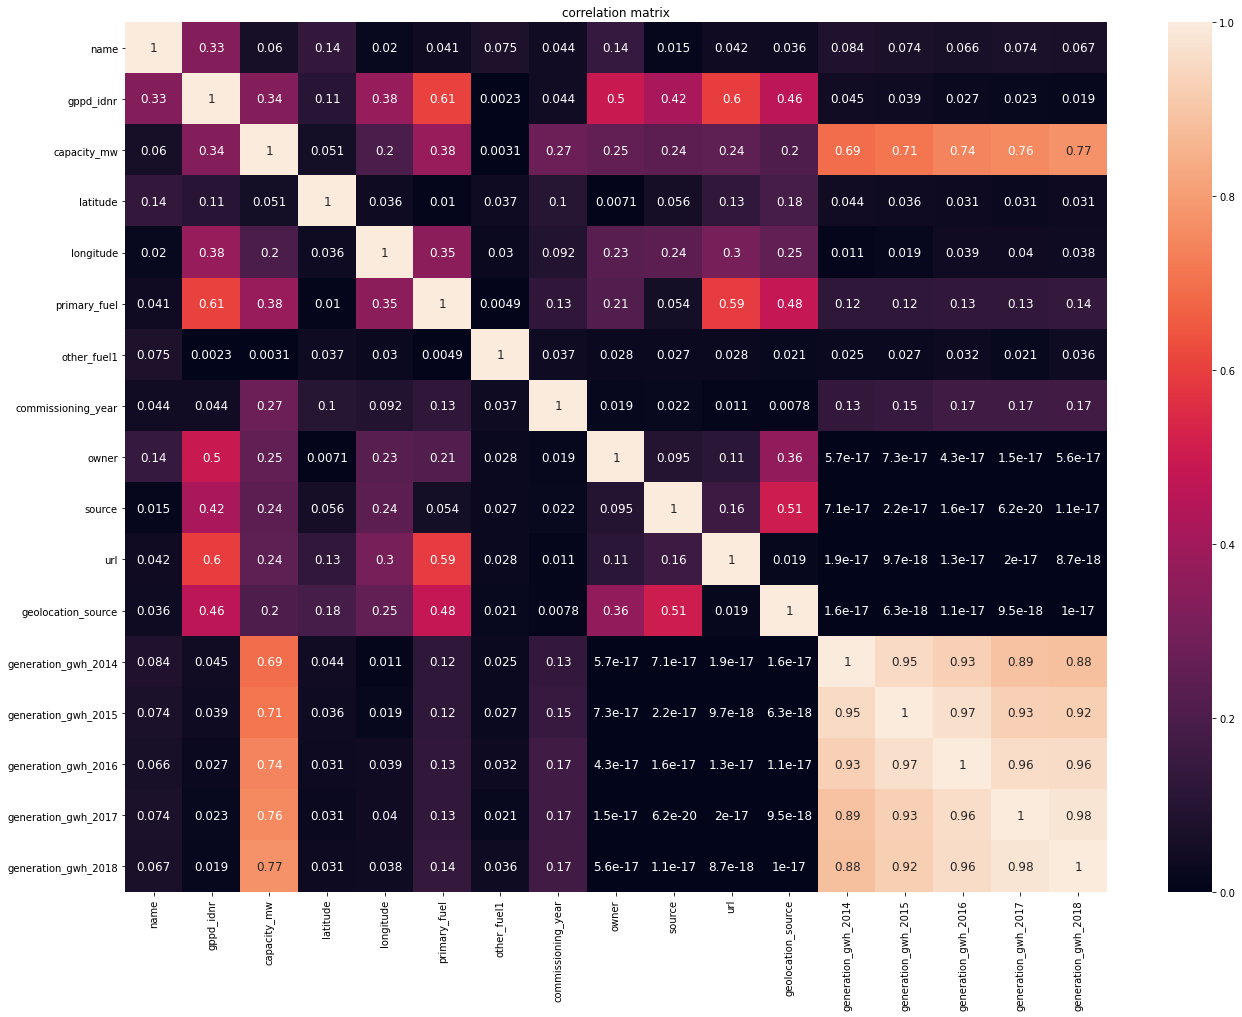

In [49]:
idf_corr=it_df.corr().abs()

plt.figure(figsize=(22,16))
sns.heatmap(idf_corr,annot=True,annot_kws={'size':12})
plt.title('correlation matrix')
plt.show()    

# Correlation of primary_fuel with other features:

In [50]:
corr=it_df.corr()
corr['primary_fuel'].sort_values(ascending=False)

primary_fuel           1.000000
gppd_idnr              0.609180
url                    0.589886
source                 0.053613
name                   0.040753
other_fuel1            0.004912
latitude              -0.010204
generation_gwh_2014   -0.124769
generation_gwh_2015   -0.124828
commissioning_year    -0.126650
generation_gwh_2016   -0.131051
generation_gwh_2017   -0.132003
generation_gwh_2018   -0.136983
owner                 -0.212123
longitude             -0.347948
capacity_mw           -0.380395
geolocation_source    -0.483217
Name: primary_fuel, dtype: float64

>Here, gppd_idnr- is highly positively correlated where as geolocation_source is weakly correlated.

# Checking Outliers:

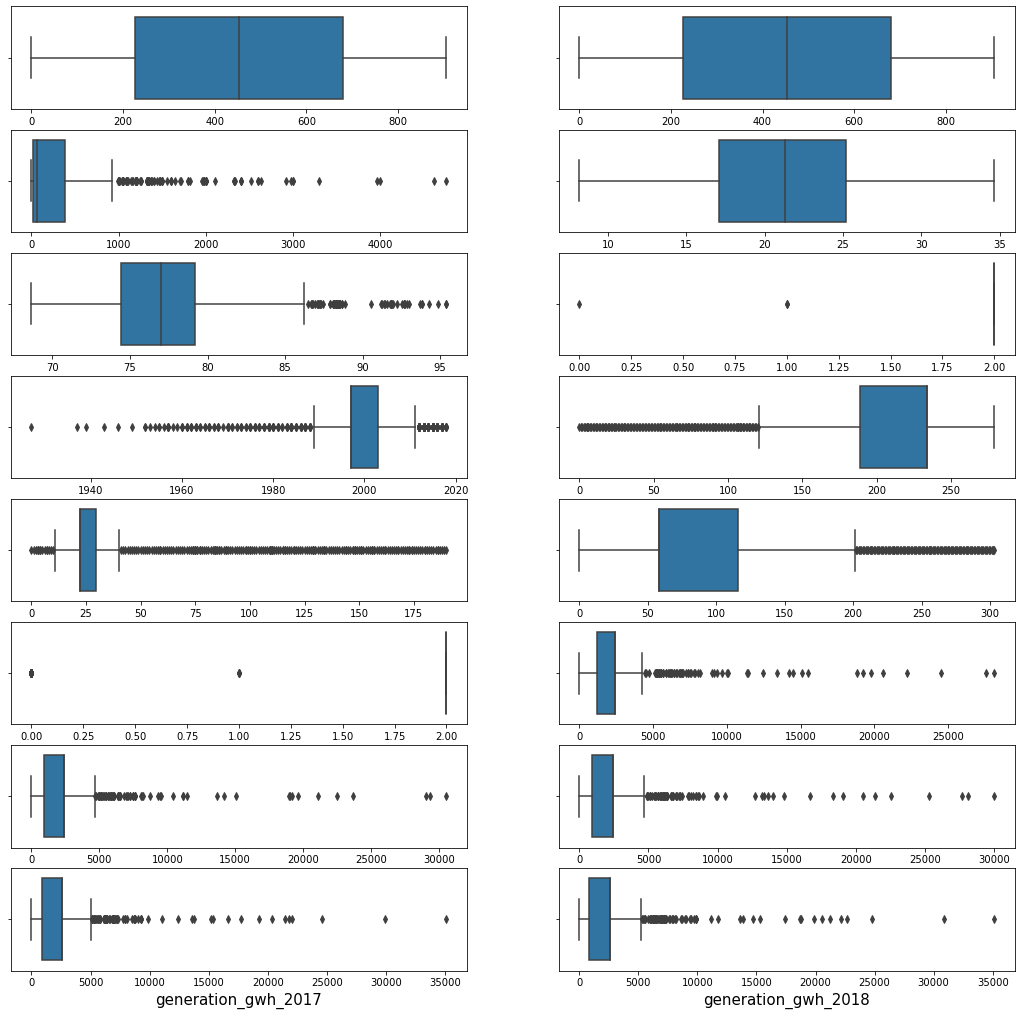

In [53]:
x=it_df.drop(columns=['primary_fuel'])
plt.figure(figsize=(18,20))
graph=1
for column in x:
    if graph<=18:
        ax=plt.subplot(9,2,graph)
        sns.boxplot(x[column],orient='v')
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()    

# The present outliers shown in the above graph can be removed using zscore technique

# Skewness:

In [54]:
it_df.skew()

name                    0.000000
gppd_idnr               0.000000
capacity_mw             3.123576
latitude               -0.149698
longitude               1.141881
primary_fuel            0.472251
other_fuel1           -20.453120
commissioning_year     -1.399359
owner                  -1.604781
source                  1.827373
url                     1.510537
geolocation_source     -2.159841
generation_gwh_2014     5.035446
generation_gwh_2015     5.364134
generation_gwh_2016     5.068427
generation_gwh_2017     5.110952
generation_gwh_2018     4.937907
dtype: float64

Skewness cannot be identified with these scores since most of the data is categorical,so we opt for feature selection method and further try to transform the values to remove skewness.

# Feature Selection Method:

In [14]:
from sklearn.feature_selection import SelectKBest,f_classif

x=it_df.drop('primary_fuel',axis=1)
y=it_df.primary_fuel 

best_features=SelectKBest(score_func=f_classif,k=12)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)

feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=['Feature_name','Score']

feature_scores.nlargest(12,'Score')

,Feature_name,Score
10,geolocation_source,2699.559385
1,gppd_idnr,268.370328
9,url,256.829525
8,source,110.055166
7,owner,82.422388
2,capacity_mw,54.854670
6,commissioning_year,31.942317
4,longitude,29.174320
15,generation_gwh_2018,27.933216
14,generation_gwh_2017,27.147952


In [ ]:
# getting all the listed top 12 features data:

In [58]:
feature_scores.nlargest(12,'Score')['Feature_name'].unique()

array(['geolocation_source', 'gppd_idnr', 'url', 'source', 'capacity_mw',
       'owner', 'commissioning_year', 'longitude', 'generation_gwh_2018',
       'generation_gwh_2017', 'generation_gwh_2016',
       'generation_gwh_2014'], dtype=object)

In [ ]:
# Creating a new data frame using the fetures selected above with target variable.

In [15]:
df_new=it_df[['geolocation_source', 'gppd_idnr', 'url', 'source', 'capacity_mw',
       'owner', 'commissioning_year', 'longitude', 'generation_gwh_2018',
       'generation_gwh_2017', 'generation_gwh_2016',
       'generation_gwh_2014','primary_fuel']]
df_new

,geolocation_source,gppd_idnr,url,source,capacity_mw,owner,commissioning_year,longitude,generation_gwh_2018,generation_gwh_2017,generation_gwh_2016,generation_gwh_2014,primary_fuel
0,1.0,657.0,128.0,109.0,2.5,229.0,2011.000000,73.2407,2600.804099,2547.759305,2467.936859,2431.823590,6
1,2.0,519.0,173.0,174.0,98.0,258.0,1997.091082,74.6090,2600.804099,2547.759305,2467.936859,2431.823590,1
2,2.0,853.0,205.0,21.0,39.2,2.0,1997.091082,69.3732,2600.804099,2547.759305,2467.936859,2431.823590,7
3,2.0,0.0,58.0,22.0,135.0,5.0,2004.000000,91.3602,626.239128,663.774500,886.004428,617.789264,2
4,2.0,1.0,58.0,22.0,1800.0,5.0,2015.000000,82.4091,7279.000000,5385.579736,6243.000000,3035.550000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,2.0,491.0,58.0,22.0,1600.0,5.0,2016.000000,77.3568,686.500000,865.400000,233.596650,2431.823590,1
903,0.0,822.0,22.0,77.0,3.0,114.0,1997.091082,78.1654,2600.804099,2547.759305,2467.936859,2431.823590,6
904,2.0,891.0,260.0,21.0,25.5,5.0,1997.091082,75.5811,2600.804099,2547.759305,2467.936859,2431.823590,7
905,2.0,539.0,82.0,59.0,80.0,91.0,1997.091082,73.7477,2600.804099,2547.759305,2467.936859,2431.823590,1


# Removing Outliers using zscore technique:

In [16]:
from scipy.stats import zscore
import numpy as np
zsc=zscore(df_new)
abs_z_score=np.abs(zsc)
filtering_entry=(abs_z_score<3).all(axis=1)
df=df_new[filtering_entry]
df

,geolocation_source,gppd_idnr,url,source,capacity_mw,owner,commissioning_year,longitude,generation_gwh_2018,generation_gwh_2017,generation_gwh_2016,generation_gwh_2014,primary_fuel
0,1.0,657.0,128.0,109.0,2.5,229.0,2011.000000,73.2407,2600.804099,2547.759305,2467.936859,2431.823590,6
1,2.0,519.0,173.0,174.0,98.0,258.0,1997.091082,74.6090,2600.804099,2547.759305,2467.936859,2431.823590,1
2,2.0,853.0,205.0,21.0,39.2,2.0,1997.091082,69.3732,2600.804099,2547.759305,2467.936859,2431.823590,7
3,2.0,0.0,58.0,22.0,135.0,5.0,2004.000000,91.3602,626.239128,663.774500,886.004428,617.789264,2
4,2.0,1.0,58.0,22.0,1800.0,5.0,2015.000000,82.4091,7279.000000,5385.579736,6243.000000,3035.550000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,2.0,491.0,58.0,22.0,1600.0,5.0,2016.000000,77.3568,686.500000,865.400000,233.596650,2431.823590,1
903,0.0,822.0,22.0,77.0,3.0,114.0,1997.091082,78.1654,2600.804099,2547.759305,2467.936859,2431.823590,6
904,2.0,891.0,260.0,21.0,25.5,5.0,1997.091082,75.5811,2600.804099,2547.759305,2467.936859,2431.823590,7
905,2.0,539.0,82.0,59.0,80.0,91.0,1997.091082,73.7477,2600.804099,2547.759305,2467.936859,2431.823590,1


# checking percentage loss:

In [61]:
loss_percent=(907-834)/907*100
loss_percent

8.04851157662624

# PowerTransformation to remove skewness:

In [17]:
x=df.drop(columns='primary_fuel')
y=df.primary_fuel

In [18]:
from sklearn.preprocessing import PowerTransformer

scaler=PowerTransformer(method='yeo-johnson')
features=['capacity_mw','longitude','commissioning_year','generation_gwh_2018','generation_gwh_2017', 'generation_gwh_2016','generation_gwh_2014']
df[features]=scaler.fit_transform(df[features].values)
df[features]

,capacity_mw,longitude,commissioning_year,generation_gwh_2018,generation_gwh_2017,generation_gwh_2016,generation_gwh_2014
0,-1.671352,-0.929613,1.279107,0.381288,0.366120,0.365398,0.332511
1,0.209732,-0.513137,-0.184442,0.381288,0.366120,0.365398,0.332511
2,-0.285656,-2.352999,-0.184442,0.381288,0.366120,0.365398,0.332511
3,0.382236,2.444581,0.493280,-0.907581,-0.887604,-0.667629,-1.029087
4,1.747270,1.247984,1.778287,2.098191,1.551428,1.915261,0.666832
...,...,...,...,...,...,...,...
902,1.686535,0.213382,1.909220,-0.849517,-0.704469,-1.402472,0.332511
903,-1.593860,0.402748,-0.184442,0.381288,0.366120,0.365398,0.332511
904,-0.517631,-0.240409,-0.184442,0.381288,0.366120,0.365398,0.332511
905,0.100172,-0.770622,-0.184442,0.381288,0.366120,0.365398,0.332511


# Desired model and Scaling:

In [19]:
x=df.drop(columns='primary_fuel')
y=df.primary_fuel
from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)


# Model building:

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

# Finding Best Random State:

In [21]:
knn=KNeighborsClassifier()
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    knn.fit(x_train,y_train)
    pred_test=knn.predict(x_test)
    acc=accuracy_score(y_test,pred_test)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
        
print('Best accuracy is: ',maxacc,'Best state is: ',maxrs)

Best accuracy is:  0.8682634730538922 Best state is:  6


# TRAIN TEST SPLIT:

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=6)

# KNeighborsClassification Model:

In [23]:
from sklearn.metrics import classification_report
knn.fit(x_train,y_train)
pred_test=knn.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,pred_test))
print('confusion_matrix: \n',confusion_matrix(y_test,pred_test))
print('classification report: ',classification_report(y_test,pred_test))

Accuracy:  0.8682634730538922
confusion_matrix: 
 [[ 5  1  0  0  0  0  0  0]
 [ 2 37  3  2  0  0  0  1]
 [ 0  4  4  2  0  0  0  0]
 [ 0  2  2 42  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  1  0  1  0  0  0  0]
 [ 0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0 26]]
classification report:                precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.80      0.82      0.81        45
           2       0.44      0.40      0.42        10
           3       0.89      0.91      0.90        46
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00        31
           7       0.96      1.00      0.98        26

    accuracy                           0.87       167
   macro avg       0.60      0.62      0.61       167
weighted avg       0.85      0.87      0.86       167



# DecisionTreeClassification model:

In [24]:
clf1=DecisionTreeClassifier()
clf1.fit(x_train,y_train)
pred_test=clf1.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,pred_test))
print('confusion_matrix: \n',confusion_matrix(y_test,pred_test))
print('classification report: ',classification_report(y_test,pred_test))

Accuracy:  0.7964071856287425
confusion_matrix: 
 [[ 5  1  0  0  0  0  0  0]
 [ 1 28  3 10  1  2  0  0]
 [ 0  3  5  2  0  0  0  0]
 [ 0  6  1 38  0  1  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  1  0  1  0  0  0  0]
 [ 0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0 26]]
classification report:                precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.70      0.62      0.66        45
           2       0.56      0.50      0.53        10
           3       0.75      0.83      0.78        46
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        26

    accuracy                           0.80       167
   macro avg       0.60      0.60      0.60       167
weighted avg       0.80      0.80      0.80       167



# LogisticRegression model:

In [25]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,pred_test))
print('confusion_matrix: \n',confusion_matrix(y_test,pred_test))
print('classification report: ',classification_report(y_test,pred_test))

Accuracy:  0.8203592814371258
confusion_matrix: 
 [[ 4  2  0  0  0  0  0  0]
 [ 1 34  4  5  0  0  0  1]
 [ 1  3  3  3  0  0  0  0]
 [ 0  6  0 40  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  1  0  1  0  0  0  0]
 [ 0  1  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0 26]]
classification report:                precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.71      0.76      0.73        45
           2       0.43      0.30      0.35        10
           3       0.82      0.87      0.84        46
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       1.00      0.97      0.98        31
           7       0.96      1.00      0.98        26

    accuracy                           0.82       167
   macro avg       0.57      0.57      0.57       167
weighted avg       0.80      0.82      0.81       167



# RandomForestClassification model:

In [26]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(x_train,y_train)
pred_test=clf.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,pred_test))
print('confusion_matrix: \n',confusion_matrix(y_test,pred_test))
print('classification report: ',classification_report(y_test,pred_test))

Accuracy:  0.874251497005988
confusion_matrix: 
 [[ 5  1  0  0  0  0  0  0]
 [ 1 37  2  3  0  2  0  0]
 [ 0  2  4  4  0  0  0  0]
 [ 0  3  0 43  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  1  0  1  0  0  0  0]
 [ 0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0 26]]
classification report:                precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.82      0.82      0.82        45
           2       0.67      0.40      0.50        10
           3       0.84      0.93      0.89        46
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        26

    accuracy                           0.87       167
   macro avg       0.65      0.62      0.63       167
weighted avg       0.86      0.87      0.87       167



# GradientBoostingClassification model:

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt=GradientBoostingClassifier()
gbdt.fit(x_train,y_train)
pred_test=gbdt.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,pred_test))
print('confusion_matrix: \n',confusion_matrix(y_test,pred_test))
print('classification report: ',classification_report(y_test,pred_test))

Accuracy:  0.8682634730538922
confusion_matrix: 
 [[ 4  2  0  0  0  0  0  0]
 [ 1 36  4  3  0  1  0  0]
 [ 0  3  5  2  0  0  0  0]
 [ 0  3  0 43  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  1  0  1  0  0  0  0]
 [ 0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0 26]]
classification report:                precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.78      0.80      0.79        45
           2       0.56      0.50      0.53        10
           3       0.88      0.93      0.91        46
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        26

    accuracy                           0.87       167
   macro avg       0.63      0.61      0.62       167
weighted avg       0.86      0.87      0.86       167



# cross_validation_score:

In [29]:
pred_test=clf.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_test)
for i in range(2,10):
    lsscore=cross_val_score(clf,x_scaled,y,cv=i)
    lsc=lsscore.mean()
    print('at cv:-',i)
    print('cv score-',lsc*100)
    print('acc_score-',lss*100)

at cv:- 2
cv score- 81.77458033573141
acc_score- 87.42514970059881
at cv:- 3
cv score- 83.09352517985612
acc_score- 87.42514970059881
at cv:- 4
cv score- 82.13390228192861
acc_score- 87.42514970059881
at cv:- 5
cv score- 84.41238005915879
acc_score- 87.42514970059881
at cv:- 6
cv score- 84.29256594724221
acc_score- 87.42514970059881
at cv:- 7
cv score- 83.81952781112444
acc_score- 87.42514970059881
at cv:- 8
cv score- 84.05334249084248
acc_score- 87.42514970059881
at cv:- 9
cv score- 83.81252921926134
acc_score- 87.42514970059881


# CHECKING CV FOR ALL THE MODELS:

In [40]:
from sklearn.model_selection import cross_val_score
csv=cross_val_score(knn,x_scaled,y,cv=5)
print('cross validation score of knn model is:',csv.mean())

cross validation score of knn model is: 0.7829593824399395


In [41]:
csv=cross_val_score(clf1,x_scaled,y,cv=5)
print('cross validation score of decision tree model is:',csv.mean())

cross validation score of decision tree model is: 0.7842002741504942


In [42]:
csv=cross_val_score(lr,x_scaled,y,cv=5)
print('cross validation score of logistic regression model is:',csv.mean())

cross validation score of logistic regression model is: 0.7638193492533005


In [43]:
csv=cross_val_score(clf,x_scaled,y,cv=5)
print('cross validation score of Random forest classifier model is:',csv.mean())

cross validation score of Random forest classifier model is: 0.8441093716182093


In [44]:
csv=cross_val_score(gbdt,x_scaled,y,cv=5)
print('cross validation score of Random forest classifier model is:',csv.mean())

cross validation score of Random forest classifier model is: 0.8249476949715028


> Considering the above validation process ,  Random forest classifier model is performing better than other models.

# HYPER PARAMETER TUNING:

In [45]:
from sklearn.model_selection import GridSearchCV
params={    'criterion':['gini','entropy'],
            'max_depth':[10,15],
            'min_samples_split':[10,11],
            'min_samples_leaf':[5,6]
           }
gri=GridSearchCV(clf,param_grid=params,cv=5,scoring='accuracy')
gri.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11]},
             scoring='accuracy')

In [46]:
print(gri.best_params_)
gri_pred=gri.best_estimator_.predict(x_test)

{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10}


In [47]:
accuracy_score(y_test,gri_pred)

0.874251497005988

# Saving the model:

In [48]:
import pickle
filename='Global_PowerPlant.pkl'
pickle.dump(gri.best_estimator_,open(filename,'wb'))


# Conclusion:

In [49]:
import numpy as np
a=np.array(y_test)
predicted=np.array(gri.best_estimator_.predict(x_test))
df_conclusion=pd.DataFrame({'Original':a,'Predicted':predicted},index=range(len(a)))
df_conclusion

,Original,Predicted
0,3,3
1,6,6
2,6,6
3,7,7
4,6,6
...,...,...
162,6,6
163,7,7
164,3,3
165,3,3


# Prediction 2: 

# loading the datset:

In [115]:
df=pd.read_csv('database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Dropping all the unwanted columns:

In [116]:
df=df.drop(columns=['country','country_long'],axis=1)

In [117]:
df=df.drop(columns=['other_fuel3','wepp_id','generation_gwh_2013','estimated_generation_gwh','other_fuel2','generation_gwh_2019'],axis=1)

# Imputing the data for clearing the null value counts:

In [118]:
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
si=SimpleImputer()
ct=make_column_transformer((si,['latitude','longitude','commissioning_year','year_of_capacity_data','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']),
                            remainder='passthrough')
it_df=pd.DataFrame(ct.fit_transform(df))
it_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,28.1839,73.2407,2011.0,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,ACME Solar Tower,WRI1020239,2.5,Solar,NaN,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN
1,24.7663,74.609,1997.091082,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,ADITYA CEMENT WORKS,WRI1019881,98.0,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN
2,21.9038,69.3732,1997.091082,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,AES Saurashtra Windfarms,WRI1026669,39.2,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN
3,23.8712,91.3602,2004.0,2019.0,617.789264,843.747,886.004428,663.7745,626.239128,AGARTALA GT,IND0000001,135.0,Gas,NaN,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,Central Electricity Authority
4,21.9603,82.4091,2015.0,2019.0,3035.55,5916.37,6243.0,5385.579736,7279.0,AKALTARA TPP,IND0000002,1800.0,Coal,Oil,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,16.2949,77.3568,2016.0,2019.0,2431.82359,0.994875,233.59665,865.4,686.5,YERMARUS TPP,IND0000513,1600.0,Coal,Oil,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,Central Electricity Authority
903,12.8932,78.1654,1997.091082,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,Yelesandra Solar Power Plant,WRI1026222,3.0,Solar,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN
904,15.2758,75.5811,1997.091082,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,Yelisirur wind power project,WRI1026776,25.5,Wind,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN
905,24.35,73.7477,1997.091082,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,ZAWAR MINES,WRI1019901,80.0,Coal,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN


In [119]:
column_to_move = it_df.pop(9)
it_df.insert(0, 'Name', column_to_move)
column_to_move1 = it_df.pop(10)
it_df.insert(1, 'gppd_idnr', column_to_move1)
column_to_move2 = it_df.pop(11)
it_df.insert(2, 'capacity_mw', column_to_move2)
column_to_move3 = it_df.pop(12)
it_df.insert(5, 'WindDir9am', column_to_move3)
column_to_move4 = it_df.pop(13)
it_df.insert(6, 'other_fuel1', column_to_move4)
column_to_move4 = it_df.pop(14)
it_df.insert(8, 'x', column_to_move4)
column_to_move4 = it_df.pop(15)
it_df.insert(9, 'y', column_to_move4)
column_to_move4 = it_df.pop(16)
it_df.insert(10, 'z', column_to_move4)
column_to_move4 = it_df.pop(17)
it_df.insert(11, 'a', column_to_move4)

it_df.columns=df.columns
it_df.index=df.index
it_df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.609,Coal,NaN,1997.091082,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,1997.091082,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747,886.004428,663.7745,626.239128,Central Electricity Authority
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.55,5916.37,6243.0,5385.579736,7279.0,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,2431.82359,0.994875,233.59665,865.4,686.5,Central Electricity Authority
903,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,1997.091082,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,NaN
904,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,1997.091082,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,NaN
905,ZAWAR MINES,WRI1019901,80.0,24.35,73.7477,Coal,NaN,1997.091082,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,2019.0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,NaN


In [120]:
it_df = it_df.apply(lambda x: x.fillna(x.value_counts().index[0]))
it_df.isnull().sum()

name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

# Describing the dataset:

In [121]:
it_df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.0,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.812291,13.016360,0.0,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1997.091082,2019.0,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,21.281800,76.979200,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,25.176450,79.206100,2003.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


# OrdinalEncoder:
 >USed to convert the data to ordinal format.

In [122]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc=OrdinalEncoder()

for i in it_df.columns:
    if it_df[i].dtypes=="object":
        it_df[i]=ord_enc.fit_transform(it_df[i].values.reshape(-1,1))
it_df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0.0,657.0,2.5,28.1839,73.2407,6.0,2.0,2011.000000,229.0,109.0,128.0,1.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
1,1.0,519.0,98.0,24.7663,74.6090,1.0,2.0,1997.091082,258.0,174.0,173.0,2.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
2,2.0,853.0,39.2,21.9038,69.3732,7.0,2.0,1997.091082,2.0,21.0,205.0,2.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
3,3.0,0.0,135.0,23.8712,91.3602,2.0,2.0,2004.000000,234.0,22.0,58.0,2.0,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,0.0
4,4.0,1.0,1800.0,21.9603,82.4091,1.0,2.0,2015.000000,234.0,22.0,58.0,2.0,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,902.0,491.0,1600.0,16.2949,77.3568,1.0,2.0,2016.000000,234.0,22.0,58.0,2.0,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000,0.0
903,903.0,822.0,3.0,12.8932,78.1654,6.0,2.0,1997.091082,114.0,77.0,22.0,0.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
904,904.0,891.0,25.5,15.2758,75.5811,7.0,2.0,1997.091082,234.0,21.0,260.0,2.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
905,905.0,539.0,80.0,24.3500,73.7477,1.0,2.0,1997.091082,91.0,59.0,82.0,2.0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0


In [ ]:
# dropping the unnecessary columns

In [123]:
it_df=it_df.drop(columns=['year_of_capacity_data','generation_data_source'],axis=1)

# Correlation using heatmap:

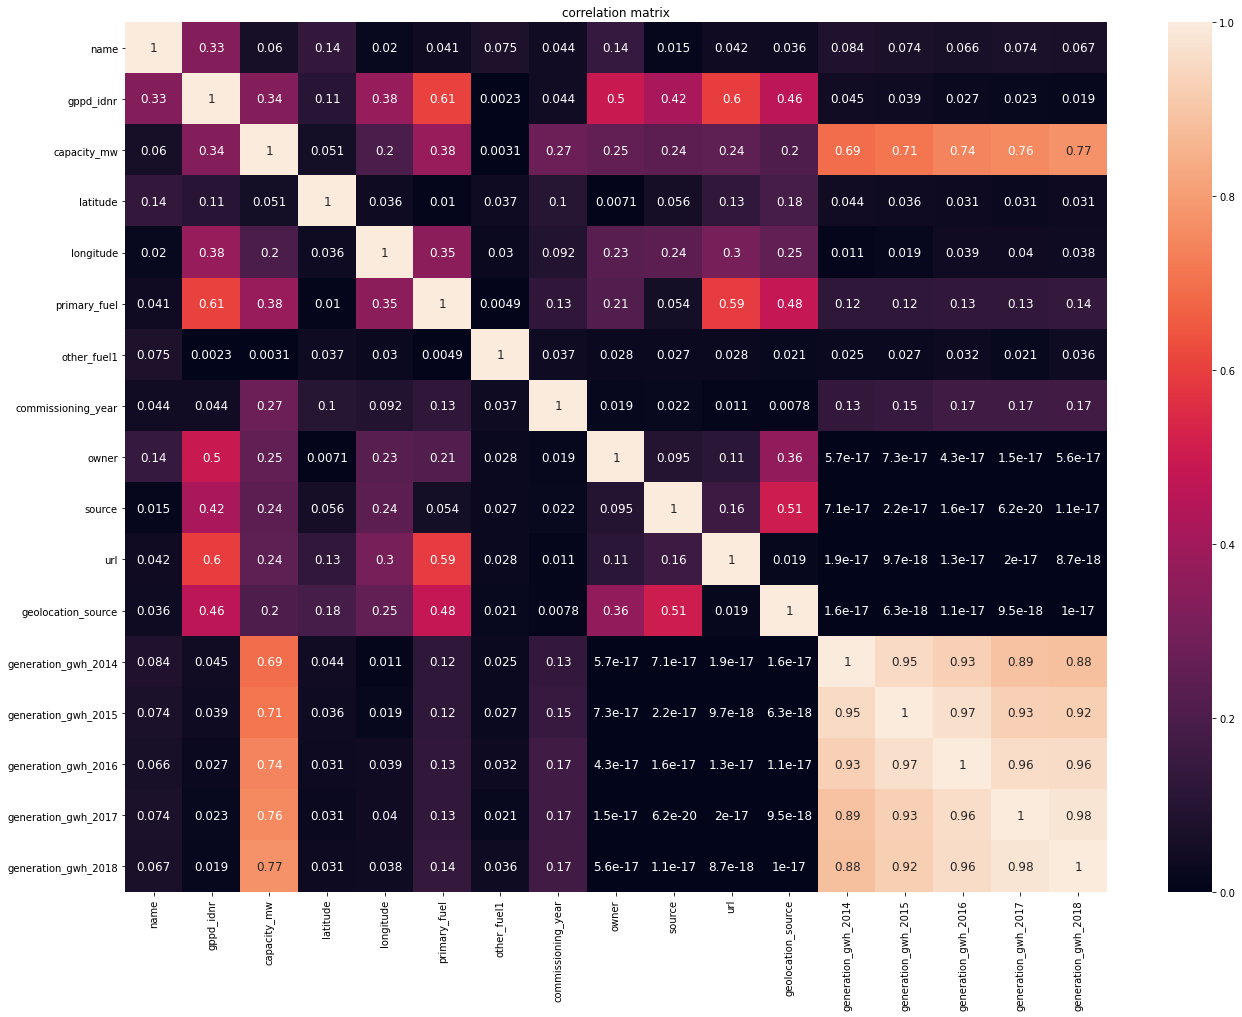

In [124]:
idf_corr=it_df.corr().abs()

plt.figure(figsize=(22,16))
sns.heatmap(idf_corr,annot=True,annot_kws={'size':12})
plt.title('correlation matrix')
plt.show()   

In [126]:
corr=it_df.corr()
corr['capacity_mw'].sort_values(ascending=False)

capacity_mw            1.000000
generation_gwh_2018    0.773456
generation_gwh_2017    0.757585
generation_gwh_2016    0.742221
generation_gwh_2015    0.711190
generation_gwh_2014    0.694350
commissioning_year     0.274292
owner                  0.252265
geolocation_source     0.204865
longitude              0.195882
name                   0.060240
latitude               0.050984
other_fuel1            0.003105
source                -0.242122
url                   -0.243830
gppd_idnr             -0.335742
primary_fuel          -0.380395
Name: capacity_mw, dtype: float64

>Correlation of target variable with other features in the dataset.

In [127]:
it_df=it_df.drop(columns=['generation_gwh_2016','url'])

# Checking the outliers:

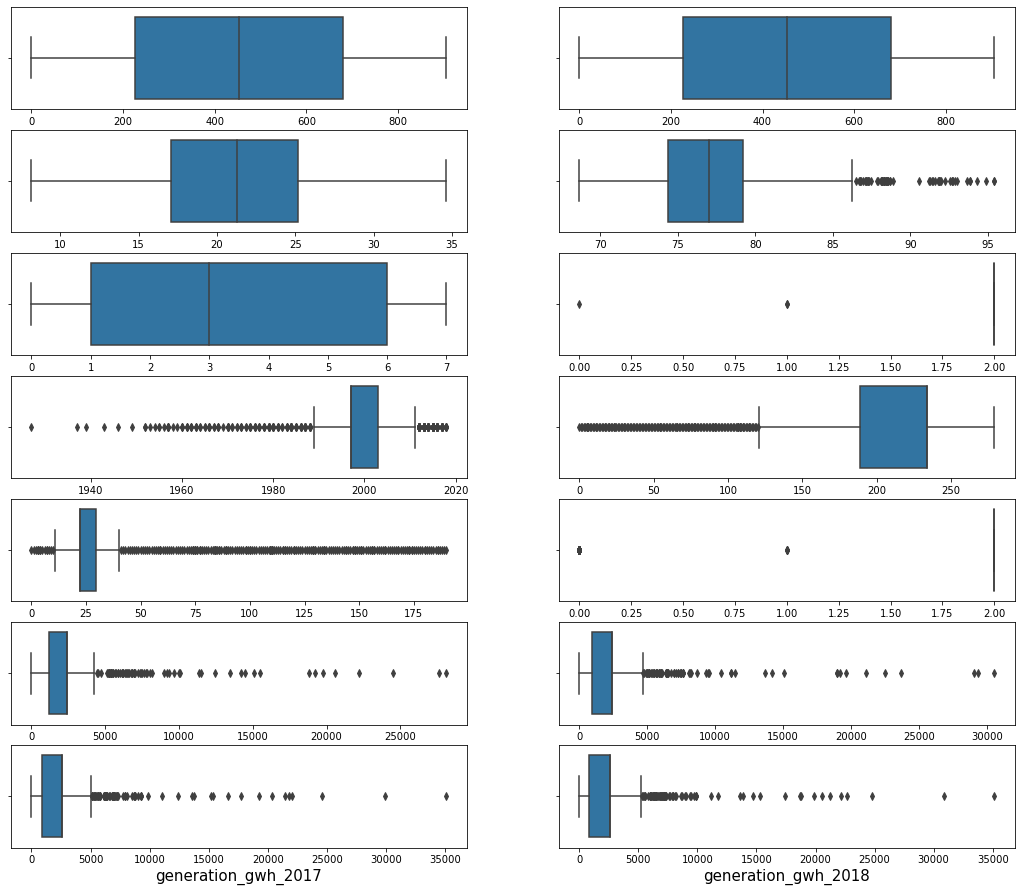

In [128]:
x=it_df.drop(columns=['capacity_mw'])
plt.figure(figsize=(18,20))
graph=1
for column in x:
    if graph<=18:
        ax=plt.subplot(9,2,graph)
        sns.boxplot(x[column],orient='v')
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()    

# Skewness:

In [129]:
it_df.skew()

name                    0.000000
gppd_idnr               0.000000
capacity_mw             3.123576
latitude               -0.149698
longitude               1.141881
primary_fuel            0.472251
other_fuel1           -20.453120
commissioning_year     -1.399359
owner                  -1.604781
source                  1.827373
geolocation_source     -2.159841
generation_gwh_2014     5.035446
generation_gwh_2015     5.364134
generation_gwh_2017     5.110952
generation_gwh_2018     4.937907
dtype: float64

>skewness values here are not considered because most of the columns are categorical.

# FEATURE SELECTION METHOD:

In [132]:
from sklearn.feature_selection import SelectKBest,f_classif

x=it_df.drop('capacity_mw',axis=1)
y=it_df.primary_fuel 

best_features=SelectKBest(score_func=f_classif,k=12)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)

feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=['Feature_name','Score']

feature_scores.nlargest(12,'Score')

,Feature_name,Score
4,primary_fuel,inf
9,geolocation_source,2699.559385
1,gppd_idnr,268.370328
8,source,110.055166
7,owner,40.524602
6,commissioning_year,31.942317
3,longitude,29.174320
13,generation_gwh_2018,27.933216
12,generation_gwh_2017,27.147952
10,generation_gwh_2014,23.960268


In [133]:
feature_scores.nlargest(12,'Score')['Feature_name'].unique()

array(['primary_fuel', 'geolocation_source', 'gppd_idnr', 'source',
       'owner', 'commissioning_year', 'longitude', 'generation_gwh_2018',
       'generation_gwh_2017', 'generation_gwh_2014',
       'generation_gwh_2015', 'latitude'], dtype=object)

# Creating a new dataframe with all the best features selected along with the target vbariable:

In [134]:
df_new=it_df[['primary_fuel', 'geolocation_source', 'gppd_idnr', 'source',
       'owner', 'commissioning_year', 'longitude', 'generation_gwh_2018',
       'generation_gwh_2017', 'generation_gwh_2014',
       'generation_gwh_2015', 'latitude','capacity_mw']]
df_new

,primary_fuel,geolocation_source,gppd_idnr,source,owner,commissioning_year,longitude,generation_gwh_2018,generation_gwh_2017,generation_gwh_2014,generation_gwh_2015,latitude,capacity_mw
0,6.0,1.0,657.0,109.0,229.0,2011.000000,73.2407,2600.804099,2547.759305,2431.823590,2428.226946,28.1839,2.5
1,1.0,2.0,519.0,174.0,258.0,1997.091082,74.6090,2600.804099,2547.759305,2431.823590,2428.226946,24.7663,98.0
2,7.0,2.0,853.0,21.0,2.0,1997.091082,69.3732,2600.804099,2547.759305,2431.823590,2428.226946,21.9038,39.2
3,2.0,2.0,0.0,22.0,234.0,2004.000000,91.3602,626.239128,663.774500,617.789264,843.747000,23.8712,135.0
4,1.0,2.0,1.0,22.0,234.0,2015.000000,82.4091,7279.000000,5385.579736,3035.550000,5916.370000,21.9603,1800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1.0,2.0,491.0,22.0,234.0,2016.000000,77.3568,686.500000,865.400000,2431.823590,0.994875,16.2949,1600.0
903,6.0,0.0,822.0,77.0,114.0,1997.091082,78.1654,2600.804099,2547.759305,2431.823590,2428.226946,12.8932,3.0
904,7.0,2.0,891.0,21.0,234.0,1997.091082,75.5811,2600.804099,2547.759305,2431.823590,2428.226946,15.2758,25.5
905,1.0,2.0,539.0,59.0,91.0,1997.091082,73.7477,2600.804099,2547.759305,2431.823590,2428.226946,24.3500,80.0


# ZSCORE TECHNIQUE:

TO REMOVE OUTLIERS:

In [135]:
from scipy.stats import zscore
import numpy as np
zsc=zscore(df_new)
abs_z_score=np.abs(zsc)
filtering_entry=(abs_z_score<3).all(axis=1)
df=df_new[filtering_entry]
df

,primary_fuel,geolocation_source,gppd_idnr,source,owner,commissioning_year,longitude,generation_gwh_2018,generation_gwh_2017,generation_gwh_2014,generation_gwh_2015,latitude,capacity_mw
0,6.0,1.0,657.0,109.0,229.0,2011.000000,73.2407,2600.804099,2547.759305,2431.823590,2428.226946,28.1839,2.5
1,1.0,2.0,519.0,174.0,258.0,1997.091082,74.6090,2600.804099,2547.759305,2431.823590,2428.226946,24.7663,98.0
2,7.0,2.0,853.0,21.0,2.0,1997.091082,69.3732,2600.804099,2547.759305,2431.823590,2428.226946,21.9038,39.2
3,2.0,2.0,0.0,22.0,234.0,2004.000000,91.3602,626.239128,663.774500,617.789264,843.747000,23.8712,135.0
4,1.0,2.0,1.0,22.0,234.0,2015.000000,82.4091,7279.000000,5385.579736,3035.550000,5916.370000,21.9603,1800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1.0,2.0,491.0,22.0,234.0,2016.000000,77.3568,686.500000,865.400000,2431.823590,0.994875,16.2949,1600.0
903,6.0,0.0,822.0,77.0,114.0,1997.091082,78.1654,2600.804099,2547.759305,2431.823590,2428.226946,12.8932,3.0
904,7.0,2.0,891.0,21.0,234.0,1997.091082,75.5811,2600.804099,2547.759305,2431.823590,2428.226946,15.2758,25.5
905,1.0,2.0,539.0,59.0,91.0,1997.091082,73.7477,2600.804099,2547.759305,2431.823590,2428.226946,24.3500,80.0


# checking percentage loss:

In [136]:
loss_percent=(907-834)/907*100
loss_percent

8.04851157662624

# Power transformation:
this transforms the dat with for less effect of skewness present in the dataset

In [138]:
x=df.drop(columns='capacity_mw')
y=df.capacity_mw

In [142]:
from sklearn.preprocessing import PowerTransformer

scaler=PowerTransformer(method='yeo-johnson')
features=['longitude','commissioning_year','generation_gwh_2014','generation_gwh_2015','generation_gwh_2017','generation_gwh_2018',]
df[features]=scaler.fit_transform(df[features].values)
df[features]

,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2017,generation_gwh_2018
0,-0.929613,1.279107,0.332511,0.361999,0.366120,0.381288
1,-0.513137,-0.184442,0.332511,0.361999,0.366120,0.381288
2,-2.352999,-0.184442,0.332511,0.361999,0.366120,0.381288
3,2.444581,0.493280,-1.029087,-0.714966,-0.887604,-0.907581
4,1.247984,1.778287,0.666832,1.878809,1.551428,2.098191
...,...,...,...,...,...,...
902,0.213382,1.909220,0.332511,-2.087857,-0.704469,-0.849517
903,0.402748,-0.184442,0.332511,0.361999,0.366120,0.381288
904,-0.240409,-0.184442,0.332511,0.361999,0.366120,0.381288
905,-0.770622,-0.184442,0.332511,0.361999,0.366120,0.381288


# Desired model and scaling the data:

In [143]:
x=df.drop(columns='capacity_mw')
y=df.capacity_mw
from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)


# Importing required libraries:

In [144]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Finding best randomstate:

In [145]:
lr=LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print(f'At random state-{i},the training accuracy is -{r2_score(y_train,pred_train)}')
        print(f'At random state-{i},the testing accuracy is -{r2_score(y_test,pred_test)}')
        print('\n')


At random state-57,the training accuracy is -0.5806333175640359
At random state-57,the testing accuracy is -0.5811038749410149




# Train test split:

In [146]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=57)


# LinearRegression model:

In [147]:
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
r2_score(y_test,pred_test)

0.5811038749410149

In [148]:
pred_train=lr.predict(x_train)

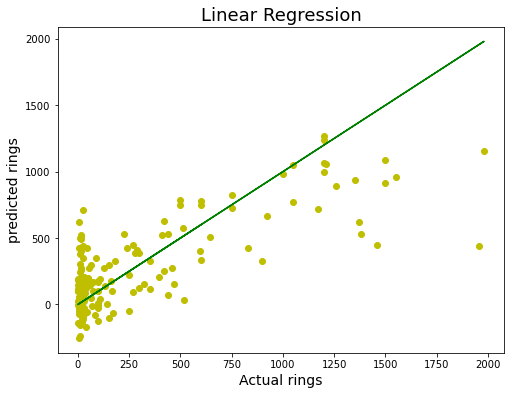

In [149]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,pred_test,color='y')
plt.plot(y_test,y_test,color='g')
plt.xlabel('Actual rings',fontsize=14)
plt.ylabel('predicted rings',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Hyper parameter tunning:

In [150]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters={'alpha':[0.0001,.001,.01,.1,1,10], 'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


# Lasso model:

In [151]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.5810710356531201

# cross_val_score:

In [152]:
from sklearn.model_selection import cross_val_score
csv=cross_val_score(ls,x,y,cv=9)
cv_mean=csv.mean()
cv_mean

0.5255633000187332

# RandomForestRegression model

In [153]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


parameters={'criterion':['mse', 'mae'],'max_features':['auto', 'sqrt', 'log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [154]:
rf=RandomForestRegressor(criterion='mse',max_features='sqrt')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_rf=rf.predict(x_test)

rfs=r2_score(y_test,pred_rf)
print('R2 Score: ',rfs*100)

rfcsv=cross_val_score(rf,x,y,cv=3)
rf_cv_mean=rfcsv.mean()
print('Cross validation Score: ',rf_cv_mean*100)

R2 Score:  79.11484649447657
Cross validation Score:  79.44419598307114


# SVR model:

In [155]:
from sklearn.svm import SVR
parameters={'kernel':['linear','poly', 'rbf'],'gamma':['scale', 'auto']}
svr=SVR()
clf1=GridSearchCV(svr,parameters)
clf1.fit(x_train,y_train)

print(clf1.best_params_)

{'gamma': 'scale', 'kernel': 'linear'}


In [156]:
svr=SVR(kernel='linear',gamma='scale')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_rf=svr.predict(x_test)

svrs=r2_score(y_test,pred_rf)
print('R2 Score: ',svrs*100)

svrcsv=cross_val_score(svr,x,y,cv=3)
svr_cv_mean=svrcsv.mean()
print('Cross validation Score: ',svr_cv_mean*100)

R2 Score:  38.31264210442886
Cross validation Score:  39.42980596570087


# DecisionTreeRegression model:

In [157]:
from sklearn.tree import DecisionTreeRegressor

param_grid={'criterion':['mse', 'mae'],
            'max_depth':range(10,15),
            'min_samples_split':range(3,8),
            'max_features':['auto', 'sqrt', 'log2'],
            #'max_leaf_nodea':range(3,7)
           }
dtr=DecisionTreeRegressor()
clf=GridSearchCV(dtr,param_grid)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 5}


In [158]:
dtr=DecisionTreeRegressor(criterion='mae',max_features='log2',max_depth=10,min_samples_split=5)
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)
pred_dtr=dtr.predict(x_test)

dtrs=r2_score(y_test,pred_dtr)
print('R2 Score: ',dtrs*100)

dtrcsv=cross_val_score(dtr,x,y,cv=4)
dtr_cv_mean=dtrcsv.mean()
print('Cross validation Score: ',dtr_cv_mean*100)

R2 Score:  59.25461430358301
Cross validation Score:  45.4650737271063


Random Forest Regression model is considered ,since it is performing decently good so finalising this model. 

# Saving the model:

In [159]:
import pickle
filename='global_plant.pkl'
pickle.dump(rf,open(filename,'wb'))

# Loading and getting accuracy of the model:

In [160]:
loaded_model=pickle.load(open('global_plant.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.7911484649447657


# Conclusion:

In [161]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rf.predict(x_test))
df_conclusion=pd.DataFrame({'Original_sales':a,'Predicted_sales':predicted},index=range(len(a)))
df_conclusion

,Original_sales,Predicted_sales
0,10.0,67.98170
1,500.0,478.57500
2,105.0,238.61286
3,12.0,10.48540
4,35.0,40.68080
...,...,...
162,1050.0,1308.30000
163,150.0,176.09391
164,396.0,451.41186
165,15.0,40.98100
